Root Mean Squared Error:  0.7722975074198737


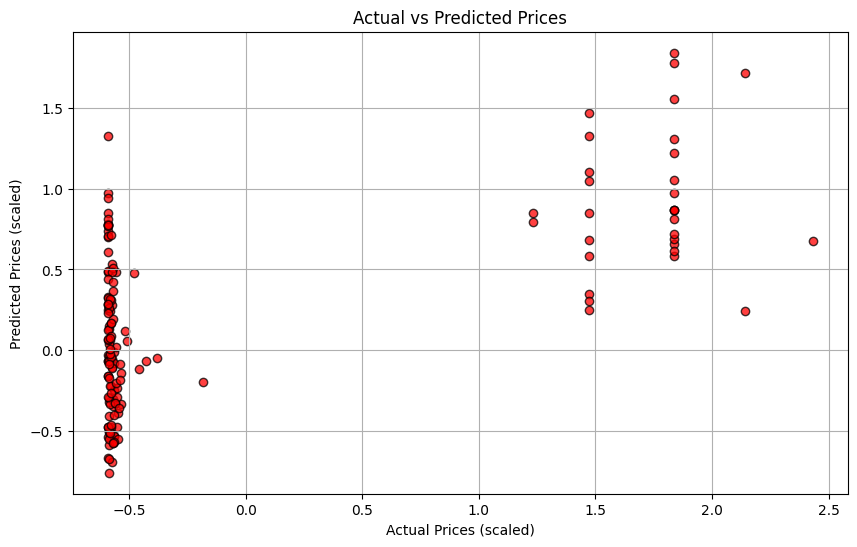

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('/content/artDataset.csv')

# Preprocess the Data

## Remove Unnecessary Columns
data.drop('Unnamed: 0', axis=1, inplace=True)

## Convert 'price' to Numeric
data['price'] = data['price'].str.extract('(\d+\.?\d*)')[0].astype(float)

## Handle Missing Values
data['artist'].fillna('Unknown Artist', inplace=True)

## Encode Categorical Variables
encoder = OneHotEncoder(sparse_output=False)
categorical_columns = ['artist', 'title', 'signed', 'condition', 'period', 'movement', 'yearCreation']
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded df with the original data
data = data.join(encoded_df)
data.drop(categorical_columns, axis=1, inplace=True)

# Scale the price column
scaler = StandardScaler()
data['price_scaled'] = scaler.fit_transform(data[['price']])

# Split the Data into Training and Testing Sets
X = data.drop(['price', 'price_scaled'], axis=1)  # Remove original price and use the scaled price for training
y = data['price_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and Train the Multi-Layer Perceptron
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam', random_state=42, learning_rate_init=0.001)
mlp.fit(X_train, y_train)

# Evaluate the Model
predictions = mlp.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Root Mean Squared Error: ", rmse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.75, color='red', edgecolors='k')
plt.xlabel('Actual Prices (scaled)')
plt.ylabel('Predicted Prices (scaled)')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()


In [2]:
# More complex MLP architecture
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=1000, activation='relu', solver='adam', random_state=42)


In [3]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your feature sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=1000, activation='relu', solver='adam', alpha=0.0001, random_state=42)


In [5]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25)],
    'alpha': [0.0001, 0.05],
    'learning_rate_init': [0.001, 0.01],
    'solver': ['adam', 'sgd']
}

mlp = MLPRegressor(max_iter=1000)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(100,), (100, 50),
                                                (100, 50, 25)],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['adam', 'sgd']})

In [6]:
from sklearn.metrics import r2_score, mean_absolute_error

predictions = clf.predict(X_test_scaled)
print("R² Score:", r2_score(y_test, predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))


R² Score: 0.31314778186572634
Mean Absolute Error: 0.5491075860669292


In [7]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=2000, activation='relu', solver='adam', random_state=42)


In [8]:
# Assuming data preparation and initial steps are done as previously described

# Scale all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and Train with a more complex MLP and increased training iterations
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=2000, activation='relu', solver='adam', alpha=0.0001, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate the Model
predictions = mlp.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error: ", rmse)
print("R² Score:", r2)


Root Mean Squared Error:  0.7529994420656647
R² Score: 0.3487504349147842
